/Users/tushuhei/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


は
き
9
ろ
た


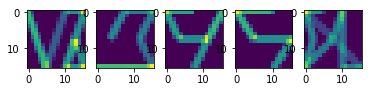

In [2]:
%matplotlib inline
from matplotlib import pylab as plt
import tensorflow as tf
import numpy as np

kanas = (u'あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほ'
         u'まみむめもやゆよらりるれろわゐんゑを'
         u'abcdefghijklmnopqrstuvwxyz1234567890'
         u'♡ーずぐ')

record_iterator = tf.python_io.tf_record_iterator(
    path='/tmp/strokes_train.tfrecord')
for i, row in enumerate(list(record_iterator)[:5]):
    example = tf.train.Example()
    example.ParseFromString(row)
    img_string = (example.features.feature['image/encoded']
                                  .bytes_list
                                  .value[0])
    width = (example.features.feature['image/width']
                                  .int64_list
                                  .value[0])
    height = (example.features.feature['image/height']
                                  .int64_list
                                  .value[0])
    label = (example.features.feature['image/class/label']
                                  .int64_list
                                  .value[0])

    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape([16, 16, 10])
    print(kanas[label])
    plt.subplot(1,5,i+1)
    plt.imshow(np.mean(reconstructed_img, axis=-1))

/Users/tushuhei/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


ー
ー
ー
ー
ー


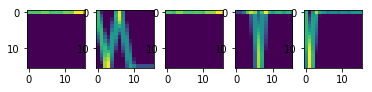

In [14]:
record_iterator = tf.python_io.tf_record_iterator(path='/tmp/strokes_train.tfrecord')
cnt = 0
for i, row in enumerate(record_iterator):
    if cnt > 4: break
    example = tf.train.Example()
    example.ParseFromString(row)
    img_string = (example.features.feature['image/encoded']
                                  .bytes_list
                                  .value[0])
    width = (example.features.feature['image/width']
                                  .int64_list
                                  .value[0])
    height = (example.features.feature['image/height']
                                  .int64_list
                                  .value[0])
    label = (example.features.feature['image/class/label']
                                  .int64_list
                                  .value[0])
    if not kanas[label] == u'ー': continue
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape([16, 16, 10])
    print(kanas[label])
    plt.subplot(1,5,cnt+1)
    plt.imshow(np.mean(reconstructed_img, axis=-1))
    cnt += 1

In [21]:
import os, json
impotr 
def load_data(kanas):

  def get_ndjson_path(zip_path):
    dir_path, filename = os.path.split(zip_path)
    body, ext = os.path.splitext(filename)
    return dir_path, os.path.join(dir_path, '%s.ndjson' % (body))

  data = []
  labels = []
  dir_path, ndjson_path = get_ndjson_path('data/strokes.zip')
  if not os.path.exists(ndjson_path):
    with zipfile.ZipFile('data/strokes.zip', 'r') as f:
      f.extractall(dir_path)
  with open(ndjson_path) as f:
    for line in f.readlines():
      line = json.loads(line)
      if not line['kana'].lower() in kanas: continue
      keydowns = [(e[0], e[2]) for e in line['events'] if e[1] == 'down']
      # TODO (tushuhei) Relax this condition to accept shorter strokes.
      if len(keydowns) < 5: continue  # Ignore if too short.
      data.append(keydowns)
      labels.append(kanas.index(line['kana'].lower()))
  labels = np.eye(len(kanas))[labels]  # Idiom to one-hot encode.
  return data, labels

data, labels = load_data(u'ー')
x = nazoru.list_keydowns2images(
      data, direction_feature=True, gradual_feature=True, scale=16, stroke_width=2) / 255.

NameError: name 'nazoru' is not defined